In [105]:
# Import Libraries
import pandas as pd
import spacy
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [106]:
!pip install emoji
from emoji import demojize

In [107]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [132]:
!pip install langdetect
import nltk
nltk.download('stopwords')
from langdetect import detect, LangDetectException

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
!pip install googletrans
from googletrans import Translator

In [110]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

In [111]:
# Load spaCy model with sentencizer
nlp = spacy.load("en_core_web_sm")
if "sentencizer" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")
print("spaCy pipeline:", nlp.pipe_names)

spaCy pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'sentencizer']


In [112]:
def load_data():
    """Load the dataset (100 rows hardcoded here; replace with CSV for 5,000 rows)."""

    data = pd.read_csv('review.csv')
    # data = {
    #     "reviewId": ["a6dc9bc5-63c3-4c61-aae3-ffa32cbe1236", "5d5d1c5c-e3e6-465c-9744-bcd28b74f3eb", "68d0f3f4-1842-4693-b709-09e80e4e6b07", "65ce05c4-b52e-4055-a9ab-3317ae01f013", "ff3e7834-4fdd-43d8-83c9-c652af1b5afe", "dca3ec27-7c4d-4d52-a842-15e57f78138c", "7d033781-323e-4755-8346-4eb6e1197e84", "8d03996a-d7ff-4847-9115-d411e949c806", "bd21bb06-2928-4486-a223-f9fb79381f93", "b6ecb2aa-638e-4acb-a363-7e5a333b9f09", "015c61d0-c544-43af-a167-b434dd439e49", "9cd0220a-643d-43b8-a672-bba1ef2f1133", "348b3650-81c1-47d3-b6ca-9e0db8d9dcff", "8f6efad7-6ed9-4643-acca-061347a49b6f", "e1e8e074-92e6-4112-8fe8-b96e80ab6aab", "86e5c282-9d61-49a4-8104-dfc7852e5fbb", "be1cd3e8-cdfd-4465-ac1d-7ea91700b514", "1dbbc7aa-9cbb-4bb2-a43c-a78e4ad80fba", "9c4aefe3-1e3f-40d6-bcbb-afae37a559d7", "8d0bb8f9-3d9b-4ecb-aa68-8917fe89e845", "c0c3d756-25b8-4939-9126-cdbc9dd782cb", "9396cf13-2f64-4f35-a520-88900c8a7152", "d941cfd6-b70e-4dfa-a389-016cfc4b4cb3", "685b5725-2726-460e-ab54-4808c7a74707", "100c346f-8abb-49b0-bdc7-c7598260061e", "d7034b24-8e0a-43b4-86b6-7f5f11f37392", "0cd713ef-a2a1-4b63-8ac2-d87c475e831e", "f5f9aff6-7adf-4da5-8bd0-21dd4cea895c", "8e0929e1-a3a9-401a-88bf-c6c5890a904f", "39c2ecd4-b42c-4a7b-a860-9d9c8db52177", "877ce239-7a34-42ba-8078-ca0e188a3bd8", "5c492355-c817-40ac-bebd-822fc2df7be6", "16f1d45d-b596-4c6f-93e0-cbadf3a8f6dc", "f422c193-f3f1-4ae8-b6aa-12db00bc33e7", "724a28df-07bb-48fd-b2e7-d0c81548c8db", "d75ea467-104e-4cca-ae6f-c638f9c0d54b", "8d7c4181-f267-459b-9e54-96cacadba1c6", "ecbfeeac-e431-494a-bc54-5ee5f33a5a96", "4a866a4e-cd22-4c33-afe7-08ede22e5ee3", "a981e85e-5746-491a-a611-d8792f195ce0", "9690ba00-433e-47c7-bd45-e025ad04bb9d", "b52ac170-137f-44b1-beef-b8a951233684", "cb986a84-aca2-4a35-aaf6-e17abcd5afd1", "86efb142-2541-44f1-9cc4-238f8d634e0d", "cfdfc8a3-7d6c-47c3-83b9-b7bacbb0261a", "e6808011-7737-47ab-820e-689e3d73d214", "d6ec0200-c28e-4151-b787-a73e8833c822", "f545e420-d90f-4740-8566-93567140b1ad", "75c37026-9f51-4ca2-a9af-74b6fdc10421", "7f516477-3a17-46e3-9fd4-662d86c969e8", "512c5400-edb7-4c2c-9d89-5272f1753012", "7d531830-485a-4fb6-ba5f-6f6dcfe33a69", "76877c2a-ecbd-4eb3-a0de-4634fd5852ab", "0c0e49c6-1b13-4884-aaaa-5743fd5370d2", "8a0d9913-5727-4dbe-9e1b-5e17d0d847e7", "adaee885-4dd5-4430-867c-d03bbe8b501a", "3bd48f90-2991-4ec8-a835-9ff8b5e05613", "aa3057a1-0036-4067-a29e-9e0255619012", "71dcf879-7d49-4c00-a8ab-af528c06855d", "5b6596e8-1155-497f-844b-c2c13666c8b8", "2a30ebcb-e58b-43e1-83ec-a706fe4037c5", "b2499bb7-c63c-4795-a56d-90c0b218a3a4", "120fa066-3055-47ae-93ed-b0317b7cd45a", "128637b1-6643-44ce-8ab4-7f0d660e6d03", "ab7f6831-8cd9-4e33-adca-ccaff807c2f4", "e5a6cbf6-d462-4d2d-8f09-a5709423b03f", "aa54b50b-4f1f-40bf-87c9-f17e825dd425", "044d464a-a1c0-40af-969f-f1bbdc234bfa", "4c620081-a410-43ce-ae76-5e57ef48ef17", "1fe258be-814a-408a-bdd8-7ba4f2d157d9", "91daa936-3fc7-4a14-99ee-78705292e0ac", "82f9519c-0083-4469-8f56-295fc572f92b", "4c51733e-5881-402a-8403-0c33a0a2bb4d", "b66e03c1-9951-45f5-8cf1-de379e8d69b1", "d3f4c606-fb8b-4892-87a6-3c6094fec864", "bf3a46be-6050-4630-97d7-1fe4b5d9dbbf", "ae420586-e20d-4dc1-843d-d79c0091022b", "556aa731-3de7-4805-aec7-242cd7ef9551", "143a71f3-1bf6-47a0-a8e1-63e5dc51dcbb", "ced8852c-3359-4550-8d4e-138de6decad6", "4b376883-3fa0-4471-b800-c460e80a50af", "a63ea4df-c435-45d8-ad8f-3ce43c477c65", "1c218cef-ea38-4a76-89d0-a01628731b1c", "139d5148-afd1-4168-8cd7-7dd066367afd", "c239b1f2-d0fb-4a95-a187-270fc1de32fd", "a657f081-5cdb-4513-b110-4a8ff05ce2b8", "c3ad1d91-d2cf-4e0d-8248-af0f50f369c3", "c695cfa7-c9d0-4d11-96c5-18a38361c7be", "89f2c280-ead7-48b4-931b-159d056294b6", "b96d52ac-3bd6-48bb-9ba5-b5271a24f8e5", "e780f9a2-702c-468d-9ef0-56f83cc37e08", "7ca0ca24-a8f6-4c3c-8813-79be0012890c", "d4a2424d-7e23-4bf4-a1a5-1e75469f826c", "2b965317-d050-4c5e-af47-78d550eb4dde", "671eb97f-b5ef-4574-bb7e-922586da19b0", "255e7dd8-4b24-4734-9226-4d09b30d1c28", "d89c9d64-b67e-4075-bc4a-a65df0d29507", "a1f0ee16-024f-4d0a-aa05-af806522f7e4", "99ec5549-b694-4b6d-996c-a12282b55932", "4ffa84ef-d0f1-4f46-adc4-7ec588562d08"],
    #     "content": ["ðŸ‘ðŸ‘ðŸ‘", "Always keeps stopping The worst ever app I have seen", "Nice ðŸ‘", "I am a mobile retailer .......i wan a BSNL service Provider how can i register", "Low network and confused recharge plan", "Just make this app for knowing balance. I don't care about the data harvesting. But it is frustrating to always update the app everytime I need to know about the balance. Please revert back to the old system where you show the balance after the call has ended/sent an SMS/ used data. Not everytime it is possible to update often, due to signal issue or insufficient balance. Every one is not rich like app developers and BSNL employees.", "Superâœ¨", "Superb", "Nice", "Very good network.", "After complaining, it was immediately resolved and now the BSNL SFCer is doing good work ... thanks BSNL", "Good", "Best UI", "thank you so much", "Best' app", "Very bad ðŸ˜”", "The range of the sim is have to imroved", "After upgrading the SIM, it is in idle state neither can call nor any incoming call beside showing full network only internet is active. Worst service", "Good", "App open nahi hota hai Try again Kiya but aap open nahi ho raha hai", "Excellent", "Very good", "Worst service", "Issue with caller tunes", "* Slow 4G internet speed. *Network issue. * Sms issue Unable to send or receive sms. * Instant troubleshoot AI Chat bot not available just jio , Vi etc. * OTT play below average viewer experience. * live tv channels are most of them are free channels and private tv channels are not available. * Free ringtones not available.", "very nice very cost free gopd service", "Good app", "App update daily im tired ðŸ˜¬ðŸ˜¬ðŸ˜¬ðŸ˜¬", "No proper out going calls and incoming call s are saying out of coverage , customer care says to change the sim ,my father and mother also uses bsnl does we need to change sim for every 5 years", "First bsnl self careapp is ok to view balance and stuff, but when it comes to customer service it's downright 1 star , no proper troubleshooting no proper customer service guidance, internet is also became too poor from last few days not even a 10 kB/s I mean shouldn't you guy's resolve the issues whether it's related to internet speed or app related issues, please resolve the internet related issues for sim", "Very good, so useful..", "Bsnl network very very slow...", "Super ðŸ˜Š", "Useless. Whenever I open it (once in 4 or 5 days) it asks for an update", "Excellent", "Not good", "nit properly work. no current otp receive. very late app", "Good experience and simple.", "Excellent app! The UI is very clean and simple, making it easy to navigate and saving users a lot of time. Everything inside the application is well-organized and easy to understand, which is a much-needed improvement from BSNL. However, I personally miss the old yellow themeâ€”please consider bringing it back instead of the saffron-colored theme. This new background looks absolutely unappealing. Overall, great work from BSNL! Keep improving!", "à¤¥à¥‹à¥œà¤¾ à¤ à¥€à¤• à¤•à¤°à¤¿à¤¯à¥‡. à¤¬à¤¹à¥à¤¤ à¤¸à¤¾à¤§à¤¾à¤°à¤£ à¤¹à¥ˆ", "I have 2 packs. One is expiring today, another should start today and expire after a month. But the app is showing both are expiring today. I've talked with customer care, they said, this is a glitch of the app. Please fix this.", "Easy & useful ðŸ‘", "Application show network problem..But BSNL it's a problem", "Good", "Hangs a lot, not able to login as well as not smooth for recharged", "Ok", "Internet Stopped working for 2 days. Internet downgraded to \"E\" From \"H\". tried everything but nothing changed.", "Nice one ....all in one", "Good services offered by bsnl.", "BSNL self care App is Good. Offering the Mobile Number Customer Information. I selected the Fingerprint option in setting. Bsnl self care app is not working in the mobile. Please resolve the issue immediately. Thanks Welcome any suggestions.", "Very good", "ðŸ‘ Good", "Very good app", "BSNL's service is very bad", "Or sudhaar kareðŸ™ðŸ™ðŸ‡®ðŸ‡³", "I can't recharge now", "I am with you for the past 50 years and I wish you and all your team the best. I am proud of You guys. Best Wishes.", "Good ðŸ‘", "This app lacks of features like fiber data usage, this is the basic feature but didn't provided to us. Please fix this and provide real time fiber data usageðŸ™ Overall this app is good.", "In app sr not creating and no option to activate VOLTE", "Ghatiya", "Network coverage unavailable everywhere in Bihar.Be quick stablished BSNL TOWER.", "Only app update in every month, no network update or any improvement. Very low coverage 3G network most time 100 kbps in outdoor, indoor no coverage. But the price is competiting in market. Govt is supporting pvt sector e.g. Jio. Full of tragedy. BSNL is not a trust worthy.", "Not for delhi in 2024", "Very poor. I tried too much time to get OTP but every time after entering OTP automatically it shows code is not correct.", "Apka app aur bsnl service bohot slow hair sahab Ham fir bhi apke upar ahasan karke apke costumer hai . Please app hamare uper bada ahsan kare a binti hai hamari Mera network acche se chale", "Internet speed is very slow, please upgrade, Thanks", "Very good job,", "Usefull", "What a hell. Every day need a updated bsnl app..otherwise unable to use", "Bad ðŸ’© Sarvies", "Good", "Best", "Good", "Good", "4G neet à¦¨à¦¾à¦ªà¦¾à¦¯à¦¼ ? à¦…à¦¤à¦¿ à¦¸à§‹à¦¨à¦•à¦¾à¦²à§‡ à¦¬à§à¦¯à¦¬à¦¸à§à¦¥à¦¾ à¦²à¦¬", "So far not faced such a bogus apk from any other telecom operator. Alas! when BSNL will improve.", "Good", "App is very nice but facing zero network issue therefore unable to use any data so bsnl is useless at present", "Good ðŸ’¯", "Very poor", "Supper", "Far far better than earliar\" my bsnl \" app. Thx bsnl for this new app Worst network of the world telling it sitting my hometown lumding, assam", "153 recharge done by me and next day it shows you don't have valid recharge. Customer care is third class.", "Nice ðŸ‘ðŸ»ðŸ‘ðŸ»", "Net work very slow in sector 79 mohali", "Calling is ok but net is not enough", "Bad service, coverge also very poor, net speed very slow like 2G, call droped, voice quality poor etc. à¤¬à¤¾à¤¹à¤° à¤¸à¥‡ à¤¨à¤¹à¥€ à¤²à¤—à¤¤à¤¾ (à¤¬à¥€à¤à¤¸à¤à¤¨à¤à¤²) à¤”à¤° à¤¬à¥€à¤¤à¤° à¤¸à¥‡ à¤¬à¥€ à¤¨à¤¹à¥€à¤‚ à¤²à¤—à¤¤à¤¾à¥¤ (à¤¬à¥€à¤à¤¸à¤à¤¨à¤à¤²) ðŸ˜©ðŸ¤£ðŸ˜¡", "It is very useful ðŸ‘", "Not network", "à´µàµ‡à´—à´¤ à´†à´µà´¶àµà´¯à´®à´¾à´£àµ", "No network In the BSNL it is very very poor service we are feadup in the network", "Poor performance", "Sim card on", "Waste", "Third Class Conection", "When raised a complaint, without resolving the issue always get the massage for issue resolved. Sometimes, it happens just immediately when a complaint raised. This is the routine matter. This is the customer support services.", "Good ðŸ‘", "Very Good experience", "THANK YOU"],
    #     "score": [5, 1, 5, 3, 1, 1, 5, 5, 4, 3, 5, 5, 5, 5, 5, 1, 1, 1, 5, 1, 5, 5, 1, 3, 1, 5, 5, 1, 1, 2, 5, 1, 5, 1, 5, 1, 3, 5, 4, 1, 4, 5, 3, 5, 1, 5, 2, 5, 4, 4, 1, 5, 1, 3, 1, 5, 4, 3, 1, 1, 1, 1, 1, 3, 3, 5, 5, 1, 1, 5, 5, 5, 5, 5, 1, 5, 1, 4, 1, 5, 3, 1, 5, 2, 5, 1, 5, 2, 3, 1, 1, 4, 1, 1, 1, 4, 5, 5],
    #     "at": ["24-02-2025 18:38", "24-02-2025 17:24", "24-02-2025 17:14", "24-02-2025 16:55", "24-02-2025 16:49", "24-02-2025 16:48", "24-02-2025 16:38", "24-02-2025 15:32", "24-02-2025 15:28", "24-02-2025 15:24", "24-02-2025 15:23", "24-02-2025 15:21", "24-02-2025 14:52", "24-02-2025 14:51", "24-02-2025 14:40", "24-02-2025 14:34", "24-02-2025 14:19", "24-02-2025 14:03", "24-02-2025 13:35", "24-02-2025 13:25", "24-02-2025 13:13", "24-02-2025 13:08", "24-02-2025 12:40", "24-02-2025 12:38", "24-02-2025 12:21", "24-02-2025 12:05", "24-02-2025 11:42", "24-02-2025 11:42", "24-02-2025 11:09", "24-02-2025 10:29", "24-02-2025 10:26", "24-02-2025 09:53", "24-02-2025 08:50", "24-02-2025 08:39", "24-02-2025 08:33", "24-02-2025 07:51", "24-02-2025 07:37", "24-02-2025 07:10", "24-02-2025 06:42", "24-02-2025 06:38", "24-02-2025 06:26", "24-02-2025 05:31", "24-02-2025 05:29", "24-02-2025 05:13", "24-02-2025 05:00", "24-02-2025 04:55", "24-02-2025 04:19", "24-02-2025 04:19", "24-02-2025 04:17", "24-02-2025 03:56", "24-02-2025 03:29", "24-02-2025 03:24", "24-02-2025 03:23", "24-02-2025 02:50", "24-02-2025 02:24", "24-02-2025 01:34", "24-02-2025 01:30", "23-02-2025 23:09", "23-02-2025 22:35", "23-02-2025 20:27", "23-02-2025 19:35", "23-02-2025 19:34", "23-02-2025 19:00", "23-02-2025 18:03", "23-02-2025 17:40", "23-02-2025 17:40", "23-02-2025 16:33", "23-02-2025 16:33", "23-02-2025 16:28", "23-02-2025 16:24", "23-02-2025 16:05", "23-02-2025 16:02", "23-02-2025 15:47", "23-02-2025 15:45", "23-02-2025 15:42", "23-02-2025 15:35", "23-02-2025 15:31", "23-02-2025 15:22", "23-02-2025 13:40", "23-02-2025 13:35", "23-02-2025 13:30", "23-02-2025 13:29", "23-02-2025 13:22", "23-02-2025 13:12", "23-02-2025 12:57", "23-02-2025 12:44", "23-02-2025 12:35", "23-02-2025 12:27", "23-02-2025 12:03", "23-02-2025 11:46", "23-02-2025 11:37", "23-02-2025 11:35", "23-02-2025 11:34", "23-02-2025 11:27", "23-02-2025 11:17", "23-02-2025 11:08", "23-02-2025 11:06", "23-02-2025 10:58", "23-02-2025 10:46", "23-02-2025 10:32"],
    #     "appVersion": ["3.1", "", "3.1", "1.4.1", "3.1.1", "3.1.1", "", "", "3.0.1", "", "3.1.1", "3.0.1", "2.6.1", "3.0.1", "3.0.1", "3.0.1", "3.1", "3.1.1", "3.1.1", "3.1.1", "3.1.1", "3.0.1", "3", "3.1.1", "3.1.1", "3.1.1", "3.1", "3.1", "3.1.1", "3.1.1", "3.1.1", "", "3.1", "3.1.1", "3.1.1", "3.1", "3.1.1", "3.1.1", "3.1.1", "3.1.1", "3.1.1", "3.1.1", "3.1.1", "3.0.1", "", "3.1", "3.1.1", "3.1", "3.1.1", "3", "3.0.1", "3.1.1", "3.1", "", "3.1", "3.1", "", "3.1.1", "1.2.1", "3.1.1", "", "", "3.1", "3.1", "3.1.1", "3.1", "3.0.1", "3.1", "3.1.1", "", "3.1.1", "3.1", "3.1", "3.1.1", "", "3.1.1", "2.2.0", "3.1.1", "3.1", "", "3.1.1", "3.1.1", "3", "3.1", "3.1.1", "3.1.1", "3.1", "3.1.1", "", "3.1.1", "2.6.1", "3.1", "3.1", "3.1.1", "3.1.1", "3.1"],
    #     "replyContent": ["", "Hi,\nSorry about the inconvenience. Try clearing the cache or reinstalling the app. In case the issue still persists, kindly send the error screenshot to mybsnldigital@gmail.com along with the contact details so that we check this.", "", "Please contact our customer care on 1503 for more support.Thank You", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "", "", "Dear User, we are glad you liked the app. We request you to give us a 5-star rating as it is the best encouragement for our team.", "We appreciate the feedback! Please let us know how we can earn your 5 star rating!", "", "", "", "", "", "Hello, can you share more details about your problem at mybsnldigital@gmail.com?", "Please contact our customer care on 1503 for more support.Thank You", "", "", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "", "", "Please accept our apologies for the inconvenience caused. We request you to please share details of your issue with mybsnldigital@gmail.com. We will resolve your concerns with priority.", "Please contact our customer care on 1503 for more support.Thank You", "Dear user, please contact your nearest BSNL customer service center for this issue. @SD", "", "", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503", "Hello, can you share more details about your problem at mybsnldigital@gmail.com?", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "", "Dear User, really appreciate your suggestion. We will consider it and improve our app in the new version. If you have questions or suggestions please contact us at mybsnlapp@gmail.com.", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "Hi! We are glad that you like our app. We'd very much appreciate if you have any recommendations/suggestions for us to get 5-star rating. Thank you very much.", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "Thank you! If you enjoy using the app, please rate us 5 stars. It would encourage us to continue improving the product!", "Hi, if you like the app, could you please give us more stars?", "", "Please accept our apologies for the inconvenience caused. We request you to please share details of your issue with mybsnldigital@gmail.com. We will resolve your concerns with priority.", "", "Hi, we regret the inconvenience caused. Please send us your concern to mybsnldigital@gmail.com. We will get back to you at the earliest.", "", "Dear User, we are glad you liked the app. We request you to give us a 5-star rating as it is the best encouragement for our team.", "Dear User, Thank you for your suggestions. We will try and incorporate them upcoming versions.", "Currently, this feature is not available in the app.Please contact our customer care on 1503 for more support.Thank You", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "Dear user, please contact your nearest BSNL customer service center for this issue. @SD", "", "Our technical team shared that they've fixed the issue. Please try to login again to see if it works well. If the same problem still exists, please let us know at mybsnldigital@gmail.com. Thank you.", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "", "Dear user, We understand your concern. However, the updates include important new features and improvements that ensure the app runs smoothly and securely. That’s why updating the app is necessary. Thank you for your understanding.", "Please accept our apologies for the inconvenience caused. We request you to please share details of your issue with mybsnldigital@gmail.com. We will resolve your concerns with priority.", "", "", "", "", "", "", "", "", "Thank you! If you enjoy using the app, please rate us 5 stars. It would encourage us to continue improving the product!", "", "Thank you so much for your feedback.", "Hi, sorry for the inconvenience caused. Can you please share the details of the issue with short video and number at mybsnldigital@gmail.com so that we can check and assist you better. Thanks!", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "", "", "Dear User, we can address complaints related to BSNL SELFCARE APP. For network complaints please contact Customer care @1503.", "Hello, can you share more details about your problem at mybsnldigital@gmail.com?", "", "Hello, can you share more details about your problem at mybsnldigital@gmail.com?", "Please accept our apologies for the inconvenience caused. We request you to please share details of your issue with mybsnldigital@gmail.com. We will resolve your concerns with priority.", "Dear User, we are glad you liked the app. We request you to give us a 5-star rating as it is the best encouragement for our team.", ""]
    # }

    # # Determine the shortest length
    # target_length = min(len(data["reviewId"]), len(data["content"]), len(data["score"]), len(data["at"]), len(data["appVersion"]), len(data["replyContent"]))
    # print(f"Target length: {target_length}")

    # # Truncate all lists to the shortest length
    # data["reviewId"] = data["reviewId"][:target_length]
    # data["content"] = data["content"][:target_length]
    # data["score"] = data["score"][:target_length]
    # data["at"] = data["at"][:target_length]
    # data["appVersion"] = data["appVersion"][:target_length]
    # data["replyContent"] = data["replyContent"][:target_length]

    # # Verify lengths after truncation
    # print(f"Length of reviewId: {len(data['reviewId'])}")
    # print(f"Length of content: {len(data['content'])}")
    # print(f"Length of score: {len(data['score'])}")
    # print(f"Length of at: {len(data['at'])}")
    # print(f"Length of appVersion: {len(data['appVersion'])}")
    # print(f"Length of replyContent: {len(data['replyContent'])}")

    # Create DataFrame
    data = pd.DataFrame(data)
    print("Data loaded successfully.")
    return data

In [113]:
    data = load_data()
    print("Data loaded successfully.")

Data loaded successfully.
Data loaded successfully.


In [114]:
!pip install https://github.com/explosion/spacy-models/releases/download/xx_ent_wiki_sm-3.6.0/xx_ent_wiki_sm-3.6.0-py3-none-any.whl
# Piece 2: Initialize Tools
# nlp = spacy.load("xx_ent_wiki_sm", disable=["ner"])
# translator = Translator()
# analyzer = SentimentIntensityAnalyzer()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 25.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'xx_ent_wiki_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [144]:
nlp = spacy.load("xx_ent_wiki_sm")  # Load the model
if "sentencizer" not in nlp.pipe_names:
    nlp.add_pipe("sentencizer")  # Add the sentencizer if it's not there
translator = Translator()
analyzer = SentimentIntensityAnalyzer()

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'xx_ent_wiki_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [145]:
# Piece 3: Preprocess Text
def preprocess_text(text):
    """Clean text, translate non-English, and extract locations."""
    # Keep emojis for language detection
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "en"  # Default to English if detection fails
    text = demojize(text)
    text = re.sub(r'[^\w\s:.!?]', '', text)

    if lang != "en":
        try:
            text = translator.translate(text, dest="en").text
        except Exception as e:
            print(f"Translation error: {e}")
            pass
    location = re.search(r'in\s+([A-Za-z\s]+)', text, re.IGNORECASE)
    location = location.group(1).strip() if location else None
    return text.lower(), location

In [146]:
# Piece 4: Add Time Weight
def add_time_weight(df):
    """Calculate time weight based on days from March 15, 2025."""
    # Updated format string to include seconds
    df["at"] = pd.to_datetime(df["at"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
    df["time_weight"] = df["at"].apply(lambda x: (pd.Timestamp("2025-03-15") - x).days / 30.0)
    return df

In [128]:
# Piece 5: Define Aspects
aspect_keywords = {
    "App Usability": ["app", "ui", "update", "login", "crash", "interface", "open", "work", "useful", "theme", "navigate"],
    "Network Quality": ["network", "signal", "internet", "speed", "coverage", "call", "data", "connection", "4g", "sim"],
    "Customer Service": ["customer", "support", "care", "resolve", "complaint", "service"],
    "Balance/Recharge": ["balance", "recharge", "plan", "otp", "pack"],
    "Features": ["tunes", "ott", "volte", "fiber", "feature", "ringtones", "chat", "tv"]
}
FUZZY_THRESHOLD = 80

In [129]:
# Piece 6: Extract Aspects
def extract_aspects(text):
    """Identify aspects using fuzzy matching."""
    doc = nlp(text)
    aspects = set()
    for token in doc:
        token_text = token.text.lower()
        for aspect, keywords in aspect_keywords.items():
            if any(fuzz.ratio(token_text, keyword) > FUZZY_THRESHOLD or keyword in token_text for keyword in keywords):
                aspects.add(aspect)
    return list(aspects) if aspects else ["General"]

In [130]:
# Piece 7: Get Sentiment
def get_sentiment(text, score):
    """Calculate sentiment with negation and score adjustment."""
    scores = analyzer.polarity_scores(text)
    compound = scores["compound"]
    if any(word in text.lower() for word in ["not", "nahi", "no", "never", "cant", "wont"]):
        compound = -compound
    if compound >= 0.05:
        sentiment = "Positive"
    elif compound <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    original_sentiment = sentiment
    if score <= 2 and sentiment == "Positive":
        sentiment = "Negative"
    elif score >= 4 and sentiment == "Negative":
        sentiment = "Positive"
    return sentiment, original_sentiment != sentiment

In [148]:
# Piece 8: Analyze Aspect Sentiments
def analyze_aspect_sentiments(text, aspects, score, reply):
    """Assign sentiments to aspects, handling sparsity and replies."""
    sentences = [sent.text.strip() for sent in nlp(text).sents]
    aspect_sentiments = {}
    for sent in sentences:
        for aspect in aspects:
            if any(fuzz.ratio(sent.lower(), keyword) > FUZZY_THRESHOLD or keyword in sent.lower() for keyword in aspect_keywords.get(aspect, [""])):
                sentiment, mismatched = get_sentiment(sent, score)
                aspect_sentiments[aspect] = sentiment
                break
    if not aspect_sentiments and aspects == ["General"]:
        sentiment, mismatched = get_sentiment(text, score)
        aspect_sentiments["General"] = sentiment
    if isinstance(reply, str) and reply and any(word in reply.lower() for word in ["fixed", "resolved", "assist"]):
        for aspect in aspect_sentiments:
            if aspect_sentiments[aspect] == "Negative":
                aspect_sentiments[aspect] = "Neutral"
    return aspect_sentiments

In [149]:
# Piece 9: Aggregate Sentiments
def aggregate_sentiments(df):
    """Aggregate sentiments with time weighting and version grouping."""
    aspect_counts = defaultdict(lambda: {"Positive": 0, "Negative": 0, "Neutral": 0, "Weighted": 0})
    for _, row in df.iterrows():
        weight = row["time_weight"]
        for aspect, sentiment in row["aspect_sentiments"].items():
            aspect_counts[aspect][sentiment] += 1
            aspect_counts[aspect]["Weighted"] += weight if sentiment in ["Positive", "Negative"] else weight * 0.5
    result_df = pd.DataFrame.from_dict(aspect_counts, orient="index").fillna(0)
    result_df["Total Mentions"] = result_df["Positive"] + result_df["Negative"] + result_df["Neutral"]
    for sentiment in ["Positive", "Negative", "Neutral"]:
        result_df[f"{sentiment} %"] = (result_df[sentiment] / result_df["Total Mentions"] * 100).round(2)

    version_groups = df.groupby("appVersion").apply(lambda x: defaultdict(lambda: {"Positive": 0, "Negative": 0, "Neutral": 0}))
    for version, group in df.groupby("appVersion"):
        for _, row in group.iterrows():
            for aspect, sentiment in row["aspect_sentiments"].items():
                version_groups[version][aspect][sentiment] += 1
    return result_df, version_groups

In [150]:
# Piece 10: Detect Emerging Aspects
def detect_emerging_aspects(df):
    """Cluster text to find new aspects."""
    vectorizer = TfidfVectorizer(max_features=100, stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(df["content_processed"])
    kmeans = KMeans(n_clusters=5, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    df["cluster"] = clusters
    emerging_aspects = vectorizer.get_feature_names_out()[kmeans.cluster_centers_.argsort()[:, -5:]].tolist()
    return [term for sublist in emerging_aspects for term in sublist if term not in sum(aspect_keywords.values(), [])], df

In [151]:
# Piece 11: Visualize Results
def visualize_results(result_df):
    """Generate a stacked bar chart."""
    result_df[["Positive", "Negative", "Neutral"]].plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.title("Aspect-Based Sentiment Analysis")
    plt.xlabel("Aspects")
    plt.ylabel("Count")
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.savefig("aspect_sentiment_plot.png")
    plt.show()

Data loaded successfully.
Data loaded successfully.
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error:

<ipython-input-145-e669ac0b368a>:17: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  pass


Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translation error: 'coroutine' object has no attribute 'text'
Translat

<ipython-input-149-74f2b65ca48f>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  version_groups = df.groupby("appVersion").apply(lambda x: defaultdict(lambda: {"Positive": 0, "Negative": 0, "Neutral": 0}))



Aggregated Sentiment Table (Normalized):
                  Positive  Negative  Neutral  Total Mentions  Positive %  Negative %  Neutral %      Weighted
General               2689       434     1072            4195       64.10       10.35      25.55  11083.883333
App Usability         1279      1547     1407            4233       30.21       36.55      33.24  10687.066667
Customer Service       273       423      184             880       31.02       48.07      20.91   2398.283333
Balance/Recharge        93       108      276             477       19.50       22.64      57.86    970.166667
Network Quality        132       253      278             663       19.91       38.16      41.93   1655.916667
Features                19        24       44              87       21.84       27.59      50.57    178.616667

Emerging Aspects from Clustering:
['worst', 'nice', 'good', 'bad', 'bsnl', 'poor', 'problem', 'ok', 'excellent', 'bad', 'nice', 'experience', 'thumbs_up', 'good', 'good', 'bsnl']
R

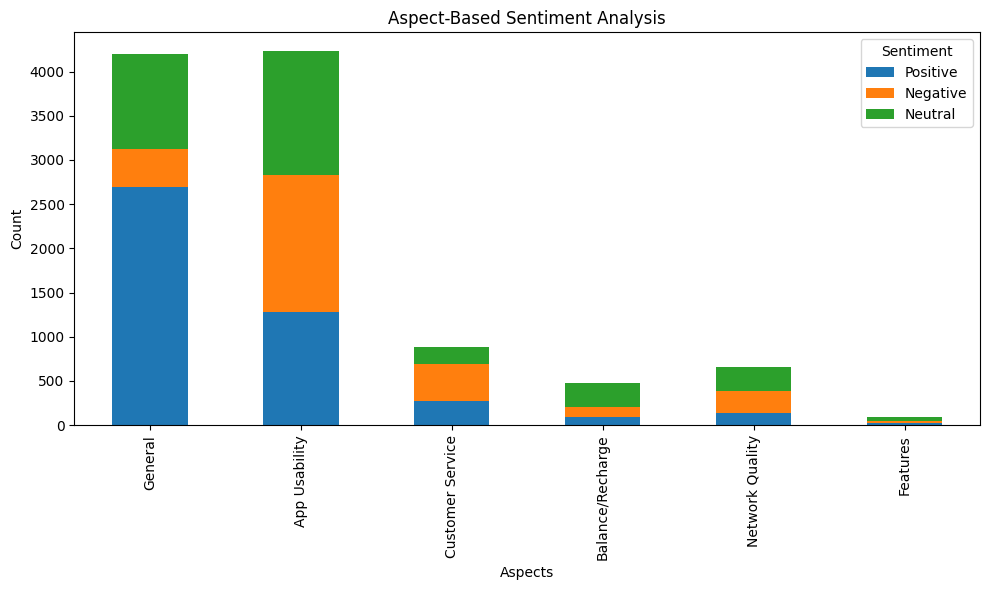

Visualization completed.


In [152]:
# Main Execution
if __name__ == "__main__":
    # Load data
    data = load_data()
    print("Data loaded successfully.")

    # Preprocess text
    data[["content_processed", "location"]] = pd.DataFrame(data["content"].apply(preprocess_text).tolist(), index=data.index)
    print("Text preprocessing completed.")

    # Add time weight
    data = add_time_weight(data)
    print("Time weights added.")

    # Extract aspects
    data["aspects"] = data["content_processed"].apply(extract_aspects)
    print("Aspects extracted.")

    # Analyze sentiments
    data["aspect_sentiments"] = data.apply(lambda row: analyze_aspect_sentiments(row["content_processed"], row["aspects"], row["score"], row["replyContent"]), axis=1)
    print("Sentiments analyzed.")

    # Aggregate sentiments
    result_df, version_groups = aggregate_sentiments(data)
    print("\nAggregated Sentiment Table (Normalized):")
    print(result_df[["Positive", "Negative", "Neutral", "Total Mentions", "Positive %", "Negative %", "Neutral %", "Weighted"]].to_string(index=True))

    # Detect emerging aspects
    emerging_aspects, data = detect_emerging_aspects(data)
    print("\nEmerging Aspects from Clustering:")
    print(emerging_aspects)

    # Save results
    result_df.to_csv("aspect_sentiment_summary.csv")
    print("Results saved to CSV.")

    # Visualize
    visualize_results(result_df)
    print("Visualization completed.")